In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
class Neurona:

    def __init__(self, n_input, name) -> None:
        self.weight = np.random.rand(n_input)-0.5
        self.neighbours = []
        self.n_neighbour = 0
        self.name = name
        
    def add_neighbour(self, neigbour):
        self.neighbours.append(neigbour)
        self.n_neighbour+=1

    def remove_neighbour(self, neigbour):
        self.neighbours.remove(neigbour)
        self.neighbours-=1

    def __str__(self) -> str:
        return self.name
    
    def distancia(self, x):
        return sum((self.weight - x)**2)

In [65]:
neuronas = []
for i in range(5):
    neurona = Neurona(2,f"num{i}")
    try:
        neuronas[-1].add_neighbour(neurona)
        neurona.add_neighbour(neuronas[-1])
    except:
        pass
    neuronas.append(neurona)



In [66]:
for n in neuronas:
    print(f"{n.name} -> {[p.__str__() for p in n.neighbours]}")

num0 -> ['num1']
num1 -> ['num0', 'num2']
num2 -> ['num1', 'num3']
num3 -> ['num2', 'num4']
num4 -> ['num3']


In [69]:
# buscamos la ganadora
x = np.array([5,2])
d = [n.distancia(x) for n in neuronas]
print(d)
np.argmax(d)

[32.16668392522448, 33.37831857066078, 28.536606845133143, 31.43579714029342, 29.852386349019877]


1

In [95]:
import numpy as np
import matplotlib.pyplot as plt


class SOM:

    def __init__(self, n_input, map_dim=(10,10), epocs=1000, learning_rate=0.1) -> None:
        self.n_input = n_input              # Dimensión de los datos de entrada
        self.map_dim = map_dim              # Dimensión del mapa SOM (defoult 10x10)
        self.epocs = epocs                  # Número de épocas de entrenamiento
        self.learning_rate = learning_rate  # Tasa de aprendizaje
        self.pesos = np.random.rand(map_dim[0], map_dim[1], n_input)

    def encontrar_neurona_ganadora(self, x):
        distancias = np.linalg.norm(self.pesos - x, axis=2)      # distancia euclidea
        ganadora = np.argmin(distancias)
        return np.unravel_index(ganadora, distancias.shape) # nos devuelve el indice para la matriz

    def trn(self, data_set):
        # Entrenamiento del SOM
        for epoc in range(self.epocs):
            for x in data_set:
                # Encontrar la neurona ganadora
                ganadora = self.encontrar_neurona_ganadora(x)

                # Actualizar los pesos de la neurona ganadora y sus vecinos
                for i in range(self.map_dim[0]):
                    for j in range(self.map_dim[1]):
                        distancia = np.linalg.norm(np.array([i, j]) - np.array(ganadora))
                        influencia = np.exp(-distancia / 2.0)  # Función de influencia
                        self.pesos[i, j] += self.learning_rate * influencia * (x - self.pesos[i, j])


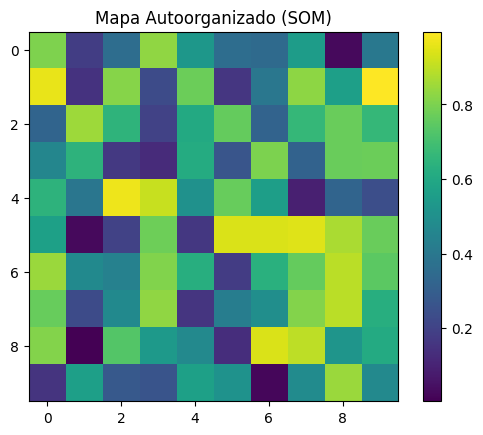

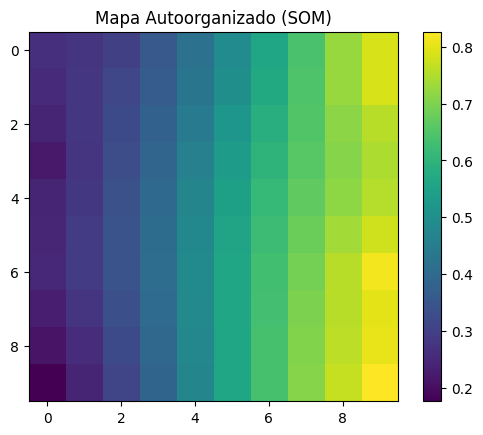

In [97]:
datos = np.random.rand(100, 2)

som = SOM(2)
plt.imshow(som.pesos[:, :, 0], cmap='viridis')  # Puedes elegir un mapa de colores, como 'viridis'
plt.title("Mapa Autoorganizado (SOM)")
plt.colorbar()  # Agregar una barra de colores para referencia
plt.show()


som.trn(datos)

plt.imshow(som.pesos[:, :, 0], cmap='viridis')  # Puedes elegir un mapa de colores, como 'viridis'
plt.title("Mapa Autoorganizado (SOM)")
plt.colorbar()  # Agregar una barra de colores para referencia
plt.show()

In [109]:
a = np.array([
    [[1,2],[3,4]],
    [[5,6],[7,8]]
])

distancias = np.linalg.norm(a, axis=1)
print(distancias)



[[ 3.16227766  4.47213595]
 [ 8.60232527 10.        ]]
